In [2]:
!pip install numpy

In [3]:
!pip install seaborn
!pip install matplotlib
!pip install pandas

In [4]:
!pip install tensorflow

ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

ModuleNotFoundError: No module named 'numpy'

In [4]:
(x_train_data, y_train_data), (x_val_data, y_val_data) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Charger et prétraiter l'ensemble de données MNIST

In [6]:
def preprocessing_function(x_train_data, y_train_data):
  x_train_data = tf.cast(x_train_data, tf.float32) / 255.0  # Normalize pixel values
  y_train_data = tf.cast(y_train_data, tf.int64)            # garantir que les labels sont dans un format compatible pour le modèle.
  return x_train_data, y_train_data

def func_creating_dataset(x_val_data, y_val_data, num_classes=10):
  y_val_data = tf.one_hot(y_val_data, depth=num_classes)  # One-hot encode labels /
  # créer un pipeline efficace \ map.=applique automatiquement le prétraitement à chaque batch.\shuffle=mélange les données pour éviter un biais d'apprentissage.\batch=regroupe les données par lot de 32 images pour optimiser l'entraînemen:
  return tf.data.Dataset.from_tensor_slices((x_val_data, y_val_data)) \
    .map(preprocessing_function) \
    .shuffle(buffer_size=1000) \
    .batch(32)

Construisez un réseau neuronal entièrement connecté

In [7]:
My_model = keras.Sequential([
    keras.layers.Reshape(target_shape=(28 * 28,), input_shape=(28, 28)),  # Flatten the input
    keras.layers.Dense(units=128, activation='relu'), # Hidden layer 1 : A layer with 256 neurons and the ReLU activation function.
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')       # Output layer :  Outputs 10 probabilities (one for each class).
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
My_model.compile(optimizer='adam',
              loss=tf.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

Entraîner le réseau neuronal

In [9]:
dataset_train = func_creating_dataset(x_train_data, y_train_data)
dataset_val = func_creating_dataset(x_val_data, y_val_data)

In [10]:
history = My_model.fit(
    dataset_train.repeat(),
    epochs=10,
    steps_per_epoch=500,
    validation_data=dataset_val.repeat(),
    validation_steps=2
)
# dataset_train.repeat(): données pour le training
# validation_data=dataset_val.repeat(),---> = ensembmle de validation, permets de suivre la progression du modèle sur des dN non vues pdt l'entrainement.comparaison de la perte et de la précision entre training et validation (évaluer sa performance)
    # validation_steps=2 --->


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7926 - loss: 0.7270 - val_accuracy: 0.9062 - val_loss: 0.3013
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9360 - loss: 0.2108 - val_accuracy: 0.9688 - val_loss: 0.1160
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9487 - loss: 0.1657 - val_accuracy: 0.9844 - val_loss: 0.1170
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9509 - loss: 0.1497 - val_accuracy: 0.9688 - val_loss: 0.0890
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9655 - loss: 0.1108 - val_accuracy: 0.9219 - val_loss: 0.2225
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9681 - loss: 0.1037 - val_accuracy: 1.0000 - val_loss: 0.0482
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9728 - loss: 0.0931 - val_accuracy: 0.9688 - val_loss: 0.1039
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9733 - loss: 0.0813 - val_accuracy: 0.

--> analyser les résultats de l'ensemble de validation en regardant val_loss et val_accuracy et en traçant leurs évolution

Observe the loss and accuracy trends over the epochs

-->vérifier si le modèle apprend bien
-->repérer les signes d'overfitting --> utilise history qui contient les métriques pr visualiser

In [12]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

Text(0.5, 1.0, 'Évolution de la perte')

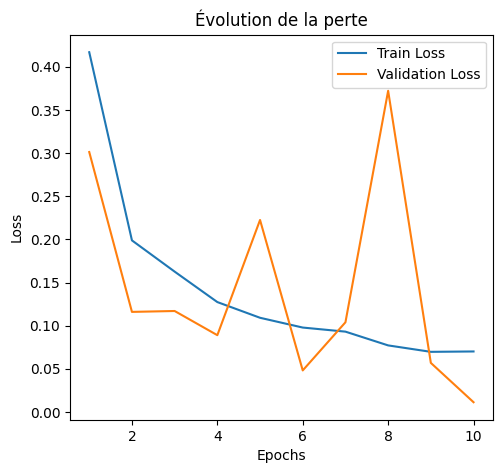

In [13]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label="Train Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Évolution de la perte")

si les 2 courbes diminuent --> modèle apprend bien
si validation loss augmente après qlq epoch -->le modèle a overfitter (devient trop spécialisé sur les doN d'entrainement donc ne généralise plus

ici notre modèle a overfitter à partir de 4 epoch :train_loss baisse alors que val_loss diminue au début puis remonte après qlq époques.

Text(0.5, 1.0, 'Évolution de la précision')

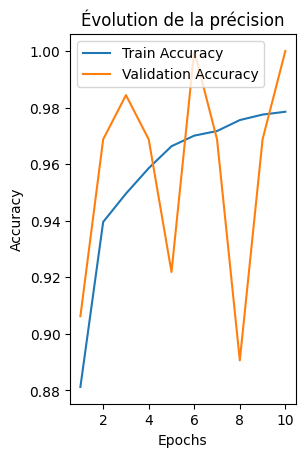

In [14]:
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, label="Train Accuracy")
plt.plot(epochs, val_acc, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Évolution de la précision")

comment interpréter : 1-train_accuracy et val_accuracy augmentent : modèle devient précis avec le temps
2-train_accuracy augmente mais val_accuracy plafonne ou diminue: overfitting
3-les 2 restent basses:modèle n'apprend pas bien

Évaluer les performances du modèle

In [25]:
test_loss, test_accuracy = My_model.evaluate(dataset_val)
print(f"Test Accuracy: {test_accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9677 - loss: 0.1144
Test Accuracy: 0.97


matrice de confusion

1-obtenir les prédictions

In [20]:
# prediction (probabilité)
y_prediction_prob = My_model.predict(dataset_val)
print(Make_predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[3.2805325e-10 2.3909521e-09 9.9999970e-01 ... 1.0140007e-09
  2.1415786e-07 4.8908473e-12]
 [9.9854994e-01 6.6803352e-08 1.0244363e-03 ... 2.8661461e-04
  2.1930900e-05 6.0448347e-06]
 [2.3287973e-07 9.9985838e-01 2.6950770e-06 ... 5.8491496e-05
  3.5180663e-05 1.8163177e-05]
 ...
 [2.1506016e-10 1.8106757e-08 5.1327358e-08 ... 9.9999994e-01
  4.1285603e-11 2.1106372e-08]
 [3.9647276e-07 4.9392277e-08 5.1075840e-05 ... 9.9991924e-01
  9.4300945e-10 4.2871380e-07]
 [4.6350132e-11 5.1714981e-08 3.0202634e-07 ... 1.9912846e-07
  1.5678883e-06 2.5660343e-06]]


In [23]:
# Convertir en classes prédictives
y_pred = np.argmax(y_prediction_prob, axis=1)

-->Afficher une matrice de confusion pour les chiffres mal classés :permet de voir les erreurs commises par le modèle

In [ ]:
2-obtenir le vraies etiquettes

In [27]:
y_true = np.concatenate([y for x, y in dataset_val], axis=0)
y_true = np.argmax(y_true, axis=1)

In [28]:
conf_matrix = confusion_matrix(y_true, y_pred)

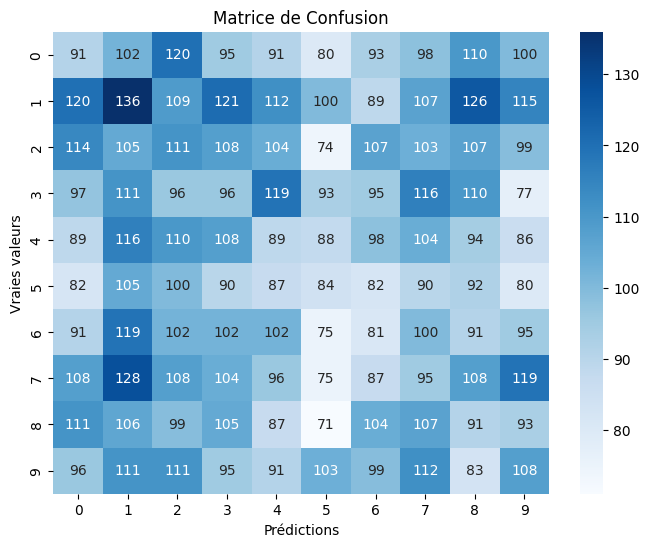

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice de Confusion")
plt.show()